# WordClouds of Presidential SOTU Addresses

Here, we'll look at WordClouds of old and new Presidential SOTU addresses, as well as Trump's (because I want to).

In [3]:
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
from collections import Counter
import nltk
import string
from scipy import misc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


As usual, create the data.

In [4]:
path = 'state-of-the-union-corpus-1989-2017'
dirs = os.listdir(path)

In [5]:
sotu_data = []
sotu_dict = {}

In [6]:
for i in range(len(dirs)):
    filename = os.path.join(path, dirs[i])
    text_file = open(filename, 'r')
    
    lines = text_file.read()
    lines = lines.replace('\n', ' ')
    
    clean_lines = ' '.join(filter(str.isalpha, lines.lower().split()))
    
    sotu_data.append(clean_lines)
    sotu_dict[filename] = clean_lines # store in dict so we can access lines by filename.

In [7]:
example = sotu_data[0]

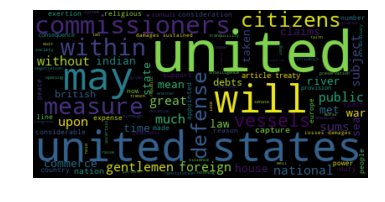

In [10]:
wordcloud = WordCloud(max_words=100).generate(example)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
sotuDict = {k[36:-4] : v for k,v in sotu_dict.items()}

In [13]:
sotu_chronological = sorted(sotuDict.items(), key=lambda kv: int(kv[0][-4:]))

We'll compile the oldest ten addresses into one text, as well as the newest ten, then do wordclouds on those separately to see the differences.

In [15]:
one = sotu_data[0]
two = sotu_data[1]

In [18]:
oldestText = one

In [19]:
for i in range(1,10):
    text = sotu_data[i]
    oldestText = oldestText + ' ' + text

There are probably much better ways to put these addresses together into one string, but the hacky solution worked so I'll let it be for now.

In [32]:
new = sotu_data[-10]

In [33]:
newestText = new

In [34]:
for i in range(-9, 0):
    text = sotu_data[i]
    newestText = newestText + ' ' + text

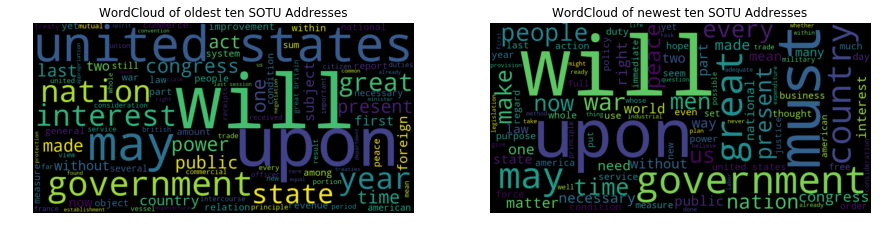

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
wordcloudOld = WordCloud(width=1200, height=600, max_words=100).generate(oldestText)
plt.title("WordCloud of oldest ten SOTU Addresses")
plt.imshow(wordcloudOld, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloudNew = WordCloud(width=1200, height=600, max_words=100).generate(newestText)
plt.title("WordCloud of newest ten SOTU Addresses")
plt.imshow(wordcloudNew, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
sotuDict.keys()

dict_keys(['Adams_1797', 'Adams_1798', 'Adams_1799', 'Adams_1800', 'Adams_1825', 'Adams_1826', 'Adams_1827', 'Adams_1828', 'Arthur_1881', 'Arthur_1882', 'Arthur_1883', 'Arthur_1884', 'Buchanan_1857', 'Buchanan_1858', 'Buchanan_1859', 'Buchanan_1860', 'Buren_1837', 'Buren_1838', 'Buren_1839', 'Buren_1840', 'Bush_1989', 'Bush_1990', 'Bush_1991', 'Bush_1992', 'Bush_2001', 'Bush_2002', 'Bush_2003', 'Bush_2004', 'Bush_2005', 'Bush_2006', 'Bush_2007', 'Bush_2008', 'Carter_1978', 'Carter_1979', 'Carter_1980', 'Carter_1981', 'Cleveland_1885', 'Cleveland_1886', 'Cleveland_1887', 'Cleveland_1888', 'Cleveland_1893', 'Cleveland_1894', 'Cleveland_1895', 'Cleveland_1896', 'Clinton_1993', 'Clinton_1994', 'Clinton_1995', 'Clinton_1996', 'Clinton_1997', 'Clinton_1998', 'Clinton_1999', 'Clinton_2000', 'Coolidge_1923', 'Coolidge_1924', 'Coolidge_1925', 'Coolidge_1926', 'Coolidge_1927', 'Coolidge_1928', 'Eisenhower_1954', 'Eisenhower_1955', 'Eisenhower_1956', 'Eisenhower_1957', 'Eisenhower_1958', 'Eisenho

In [47]:
trump_keys = ['Trump_2017', 'Trump_2018']

In [48]:
trump = sotuDict[trump_keys[0]]
trump = trump + ' ' + sotuDict[trump_keys[1]]

(-0.5, 1199.5, 599.5, -0.5)

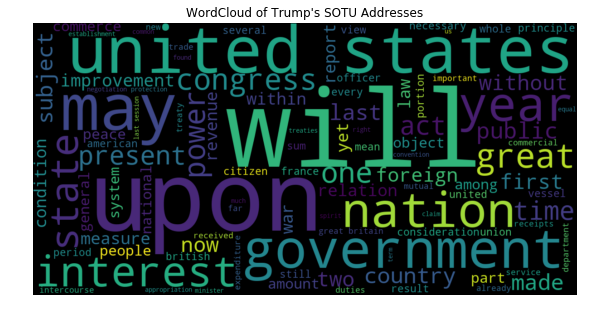

In [51]:
plt.figure(figsize=(15,5))
wordcloudTrump = WordCloud(width=1200, height=600, max_words=100).generate(oldestText)
plt.title("WordCloud of Trump's SOTU Addresses")
plt.imshow(wordcloudTrump, interpolation='bilinear')
plt.axis("off")